# Classify Handwritten Digits using Deep Neural Network

In this Project, I will:
- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
#The load_digits() function returns a copy of the hand-written digits dataset from UCI.
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digit = load_digits()

In [3]:
print(digit)
#the function load_digit return a dictionary

{'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test

In [4]:
labels = pd.Series(digit['target'])
features = pd.DataFrame(digit['data'])
#convert the numpy 2D array in digit into panda dataframe/series

In [5]:
features.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [6]:
#looks like the first row contains 64 pixel values, which means we can convert it into 8x8 2d numpy array

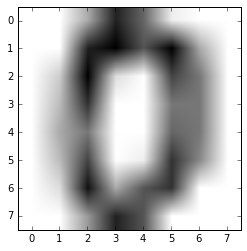

In [7]:
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)

plt.imshow(np_image, cmap='gray_r')

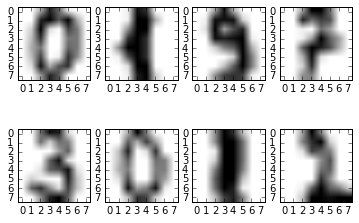

In [8]:
figure, axes = plt.subplots(2,4)

axes[0,0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
axes[0,1].imshow(features.iloc[99].values.reshape(8,8), cmap='gray_r')
axes[0,2].imshow(features.iloc[199].values.reshape(8,8), cmap='gray_r')
axes[0,3].imshow(features.iloc[299].values.reshape(8,8), cmap='gray_r')

axes[1,0].imshow(features.iloc[999].values.reshape(8,8), cmap='gray_r')
axes[1,1].imshow(features.iloc[1099].values.reshape(8,8), cmap='gray_r')
axes[1,2].imshow(features.iloc[1199].values.reshape(8,8), cmap='gray_r')
axes[1,3].imshow(features.iloc[1299].values.reshape(8,8), cmap='gray_r')

# Use KNeighborsClassifier  to tain and test, and capture the nonlinearity of data

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [10]:
#split up the data into train and training k-nn models, 50% by 50%

half_index = int(len(features)/2)

train_features = features.iloc[0:half_index]
train_labels = labels.iloc[0:half_index]
test_features = features.iloc[half_index:]
test_labels = labels.iloc[half_index:]

def train(n_neighbor, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    comparison = pd.DataFrame()
    comparison['predict'] = predictions
    comparison['actual'] = test_labels
    accuracy = sum(comparison['actual'] == comparison['predict']) / len(comparison)
    return accuracy

def cross_validate(k):
    fold_accuracy = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        knn_model = train(k, train_features, train_labels)
        accuracy = test(knn_model, test_features, test_labels)
        fold_accuracy.append(accuracy)
    return fold_accuracy

knn_two_accuracy = cross_validate(2)
np.mean(knn_two_accuracy)

0.2411111111111111

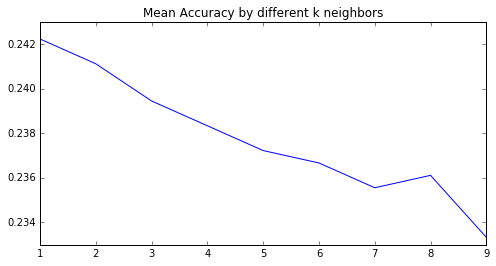

In [11]:
k_epmt = list(range(1,10))
k_accuracy = []

for k in k_epmt:
    accuracies = cross_validate(k)
    mean_acc = np.mean(accuracies)
    k_accuracy.append(mean_acc)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy by different k neighbors')
plt.plot(k_epmt, k_accuracy)
plt.show()

# Test Neural Network Models

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train(nr, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = nr)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    comparison = pd.DataFrame()
    comparison['predict'] = predictions
    comparison['actual'] = test_labels
    accuracy = sum(comparison['actual'] == comparison['predict']) / len(comparison)
    return accuracy

def cross_validate(k):
    fold_accuracy = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        knn_model = train(k, train_features, train_labels)
        accuracy = test(knn_model, test_features, test_labels)
        fold_accuracy.append(accuracy)
    return fold_accuracy


In [ ]:
nn_one_neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
neural_accuracy = []
neurons = [n[0] for n in nn_one_neurons]

for hl in nn_one_neurons:
    accuracy = cross_validate(hl)
    mean_accuracy = np.mean(accuracy)
    neural_accuracy.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy by number of neurons - one hidden layer')
plt.plot(neurons, neural_accuracy)
plt.show()